In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [14]:
data=pd.read_csv('C:\Data Scientist Internship Projects\winequality-red.csv')

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
#There is not null data in any variable, and all independent variable are float and dependent are integer
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
#Counts are similar , and if i compare mean with 50%median, these are almost nearby numbers it shows data is normally distributed
#Standard deviation is less than mean everywhere , no errors in dataset
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [7]:
x=data.drop(columns='quality',axis=1)

In [8]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [9]:
y=data[['quality']]

In [10]:
y

,quality
0,5
1,5
2,5
3,6
4,5
...,...
1594,5
1595,6
1596,6
1597,5


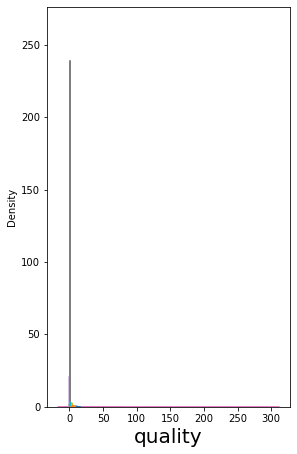

In [12]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for columns in data:
    if plotnumber<=12:
        ax=plt.subplot(3,4,plotnumber)
        sns.distplot(data[columns])
        plt.xlabel(columns,fontsize=20)
    plotnumber=+1
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

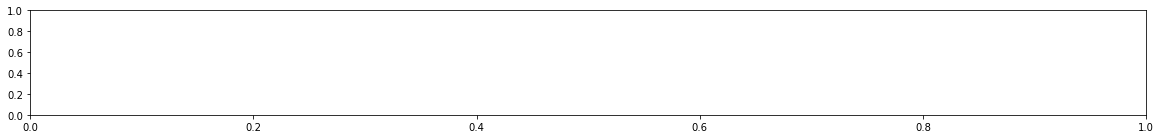

In [13]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber = 1

for column in x:
    if plotnumber<=11:
        ax=plt.subplot(11,1,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber=+1
plt.tight_layout

In [15]:
scalar=StandardScaler()
X=scalar.fit_transform(x)
X

array([[-0.52835961,  0.96187667, -1.39147228, ...,  1.28864292,
        -0.57920652, -0.96024611],
       [-0.29854743,  1.96744245, -1.39147228, ..., -0.7199333 ,
         0.1289504 , -0.58477711],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.33117661,
        -0.04808883, -0.58477711],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.70550789,
         0.54204194,  0.54162988],
       [-1.39015528,  0.65462046, -0.77526673, ...,  1.6773996 ,
         0.30598963, -0.20930812],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.51112954,
         0.01092425,  0.54162988]])

In [17]:
#Multicollinearity Test
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']=x.columns        
vif
#Two Variables Fixed Acidity and density are strogly correlated (more than 5 value),hence i will check its relation with quality

,vif,features
0,7.767512,fixed acidity
1,1.789390,volatile acidity
2,3.128022,citric acid
3,1.702588,residual sugar
4,1.481932,chlorides
5,1.963019,free sulfur dioxide
6,2.186813,total sulfur dioxide
7,6.343760,density
8,3.329732,pH
9,1.429434,sulphates


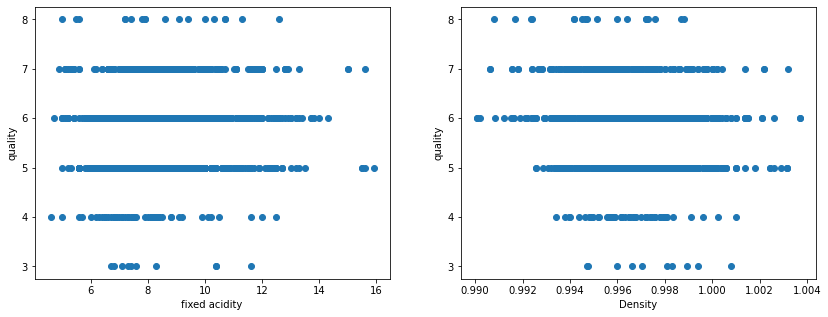

In [18]:
plt.figure(figsize=(14,5))

plt.subplot(1,2,1)
plt.scatter(data['fixed acidity'], data['quality'])
plt.ylabel('quality')
plt.xlabel('fixed acidity')

plt.subplot(1,2,2)
plt.scatter(data['density'], data['quality'])
plt.ylabel('quality')
plt.xlabel('Density')

plt.show()

##i made this to check relationship between two variables with quality to remove one of them for reducing multicollinearity
##i remove density column

In [19]:
x=data.drop(columns='density',axis=1)

In [20]:
scalar=StandardScaler()
X=scalar.fit_transform(x)
X

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

In [21]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(X,i) for i in range(X.shape[1])]
vif['features']=x.columns 
vif

,vif,features
0,2.975973,fixed acidity
1,1.852268,volatile acidity
2,3.130857,citric acid
3,1.099815,residual sugar
4,1.488196,chlorides
5,1.954036,free sulfur dioxide
6,2.201691,total sulfur dioxide
7,2.253940,pH
8,1.396431,sulphates
9,1.532875,alcohol


In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(X, y, train_size=0.5, random_state=54)
X_train.shape, X_test.shape

((799, 11), (800, 11))

In [23]:
Log_Reg=LogisticRegression()
Log_Reg.fit(X_train,Y_train)

LogisticRegression()

In [24]:
Y_pred=Log_Reg.predict(X_test)

In [25]:
accuracy=accuracy_score(Y_test,Y_pred)
accuracy
## Without removing multicollinearity my model gave accuracy score of 55% but now it is 96%
##in terms of classificaton problem , accuracy score is not much relevant or matters

0.96375

In [26]:
conf_mat=confusion_matrix(Y_test,Y_pred)
conf_mat

array([[  1,   5,   0,   0,   0,   0],
       [  1,  17,  10,   0,   0,   0],
       [  2,   0, 327,   0,   0,   0],
       [  0,   0,   0, 319,   0,   0],
       [  0,   0,   0,   0, 107,   0],
       [  0,   0,   0,   0,  11,   0]], dtype=int64)

In [27]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [28]:
print(true_negative)
print(false_negative)
print(false_positive)
print(true_positive)

17
1
5
1


In [29]:
accuracy=(true_positive+true_negative)/(true_positive+true_negative+false_positive+false_negative)
accuracy

0.75

In [30]:
precision=true_positive/(true_positive+false_positive)
precision

0.16666666666666666

In [31]:
Recall=true_positive/(true_positive+false_negative)
Recall

0.5

In [32]:
F1_Score=2*(Recall*precision)/(Recall+precision)
F1_Score

0.25

In [33]:
auc=roc_auc_score(Y_test,Y_pred,multi_class='ovr')
#auc

AxisError: axis 1 is out of bounds for array of dimension 1